# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [82]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

In [64]:
# Convertendo colunas que são numéricas para int
df['Salário'] = pd.to_numeric(df['Salário'])
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'])
df['Historico_Inadimplencia'] = pd.to_numeric(df['Historico_Inadimplencia'])
df['Imovel_Proprio'] = pd.to_numeric(df['Imovel_Proprio'])

# **Gráfico de Barras Horizontais**

A ideia aqui é avaliar a relação entre as váriaveis no caso Limite de Credito liberado por tipo de Profissão (Claramente diz a respeito ao salário)

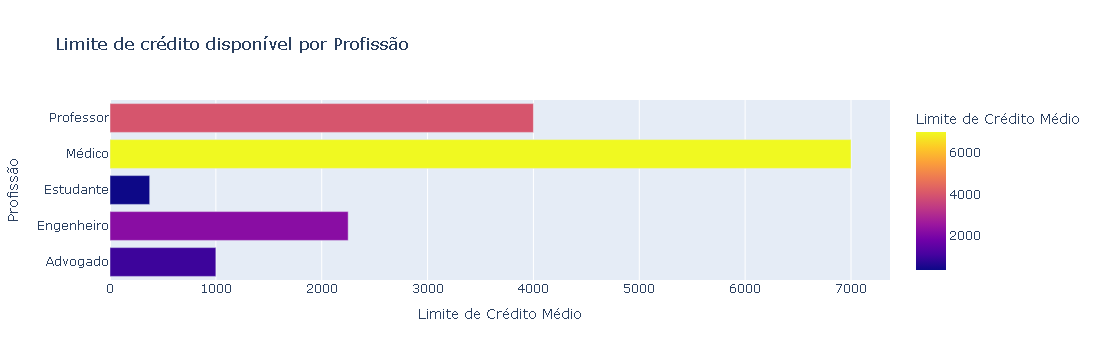

In [94]:
lc_por_profissao = df.groupby('Profissão')['Limite_Credito'].mean().reset_index()

fig = px.bar(lc_por_profissao, x='Limite_Credito', y='Profissão', orientation='h',
             title='Limite de crédito disponível por Profissão',
             labels={'Limite_Credito': 'Limite de Crédito Médio', 'Profissão': 'Profissão'},
             color='Limite_Credito', 
             width=800) 

fig.show()

# **Gráfico de Dispersão**

A ideia aqui é avaliar a relação entre as váriaveis nesse caso se nosso cliente possui ou não Histórico de Inadimplência em relação ao Limite de Credito liberado.

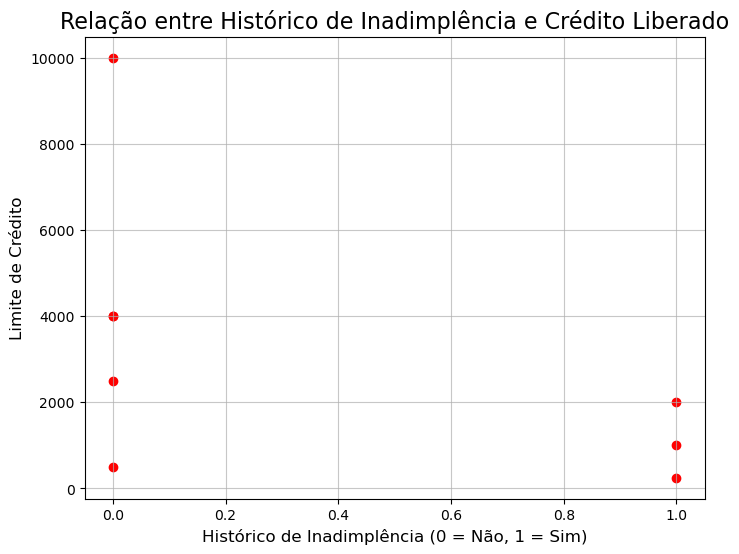

In [98]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(8, 6))

# gráfico de dispersão
plt.scatter(df['Historico_Inadimplencia'], df['Limite_Credito'], color='red')

# título e labels
plt.title('Relação entre Histórico de Inadimplência e Crédito Liberado', fontsize=16)
plt.xlabel('Histórico de Inadimplência (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Limite de Crédito', fontsize=12)

# Exibindo o gráfico
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()

# **Boxplot**
A ideia aqui écomparar a distribuição d as váriaveis nesse casose nosso cliente possui ou não imovel em relação ao  Limite de Credito liberado.

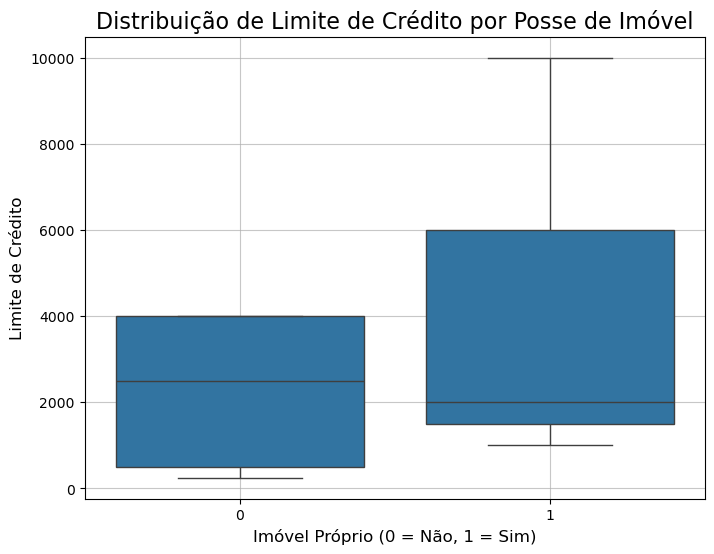

In [88]:
# tamanho do gráfico
plt.figure(figsize=(8, 6))

# Criando um boxplot 
sns.boxplot(x='Imovel_Proprio', y='Limite_Credito', data=df)

# Adicionando título e labels
plt.title('Distribuição de Limite de Crédito por Posse de Imóvel', fontsize=16)
plt.xlabel('Imóvel Próprio (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Limite de Crédito', fontsize=12)

# Exibindo o gráfico
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()